In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from datetime import datetime

/home/milan/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
city       =  'london'
infile     = '../../ProcessedData/' + city + '/venues_info/venues_time_series.dat'
timeseries = {}

for ind, line in enumerate(open(infile)):
    #if ind == 10: break
    fields = line.strip().split('\t')
    venue  = fields[0]
    times  = [float(f) for f in fields[1:]]
    
    timeseries[venue] = times
    
len(timeseries)

430460

In [4]:
features = pd.read_csv('senior_venues_features_labels_clusternames.csv', sep = '\t', index_col = 0)
features.head()

,WHERE_sub_region,WHERE_distance_from_center,WHERE_building,WHERE_food,WHERE_na,WHERE_travel,WHERE_Venues_num,WHERE_user_centroids,WHERE_parks_outdoors,WHERE_Entropy,...,WHO_v_wa_geo_stdev_of_ego_inv_distances,WHO_v_wa_betweenness_wa,WHO_v_wa_clustering_grav_distances,WHO_v_wa_geo_social_stretch_distances,WHO_v_wa_egosize,WHO_v_wa_geo_stdev_of_ego_distances,WHO_v_wa_constraint_wa,WHO_v_wa_pagerank_exp_distances,WHO_v_wa_eigenvector,LABEL_category
venue,,,,,,,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0,4.064099,0.175676,0.280405,0.010135,0.187500,592,192,0.043919,0.811208,...,0.0,0.0,0.0,2.019477,2.0,0.0,1.0,0.000019,0.0,fall
4abcec53f964a520b98720e3,0,0.232250,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,fall
4abdc1c7f964a5206d8b20e3,0,2.306181,0.317386,0.252042,0.016336,0.039090,1714,651,0.030922,0.781289,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,fall
4abe4502f964a520558c20e3,0,1.137742,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,underdogs
4abe5714f964a520d68c20e3,0,0.707539,0.199941,0.273588,0.016169,0.053239,10143,5276,0.012620,0.770677,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,fall


In [5]:
timeseries_senior_custers = {}

for cluster in list(set(features.LABEL_category)):

    features_cl = features[features.LABEL_category == cluster]
    venues      = set(list(features_cl.index))
    
    timeseries_senior_custers[cluster] = {}
    
    for v in venues:
        timeseries_senior_custers[cluster][v] = timeseries[v] 


In [7]:
fout = open('venues_firstime.csv', 'w')
for cl, venues in timeseries_senior_custers.items():         
    for ind, (ven, ts) in  enumerate(venues.items()): 
        
        #if ind == 1: break
        
        hours = Counter([datetime.fromtimestamp(ttss).hour for ttss in ts])
        days  = Counter([datetime.fromtimestamp(ttss).weekday() for ttss in ts])
         
        hour_most = str(hours.most_common(1)[0][0])
        day_most  = str(days.most_common(1)[0][0])

        fout.write(ven + '\t' + str(min(ts)) + '\t' + hour_most + '\t' + day_most + '\t' + cl + '\n')     
fout.close()




In [8]:
first_times = {}


for cl, data in timeseries_senior_custers.items():
    
    for venue, times in data.items():
        
        if cl not in first_times:
            first_times[cl] = [min(times)]
        else:
            first_times[cl].append(min(times))
            
        

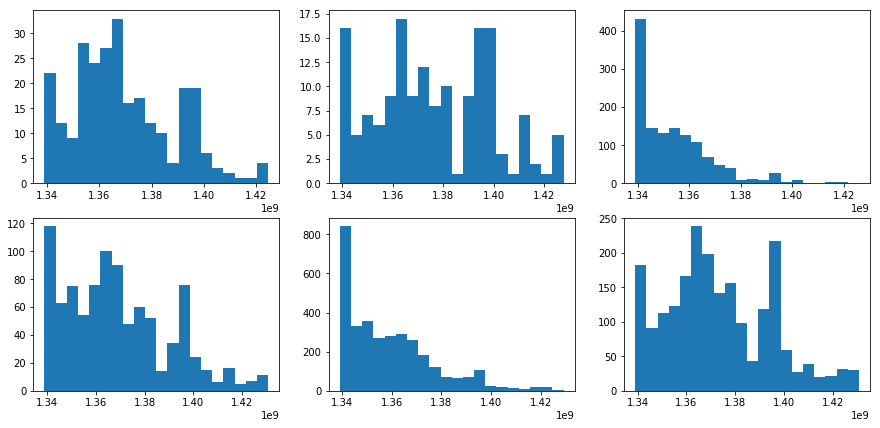

In [9]:
f, ax    = plt.subplots(2, 3, figsize = (15,7))
indicies = [(i,j) for i in range(2) for j in range(3)] 


#df_gender.to_csv('venues_genders.csv', '\t')



for ind, (cl, firsttimes) in enumerate(first_times.items()):
    
    bx = ax[indicies[ind]]
    
    bx.hist(firsttimes, bins = 20)
    



In [11]:
def getDistribution(keys, normalized = True):
    
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    distr = np.bincount(bins) 

    if normalized == 1: distr = distr/float(np.sum(distr)) 

    return np.asarray(uniq_keys.tolist()), np.asarray(distr.tolist())


def round_unix_date(dt_series, seconds=6*30*24*60*60, up=False):
    return dt_series // seconds * seconds + seconds * up



def getBinnedDistribution(x, y, nbins):

    n, bins = np.histogram(x, bins=nbins)
    sy, _   = np.histogram(x, bins=nbins, weights=y)
    mean    = sy/n

    return _, mean

def encode_cats(df, column):
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])    
    return df

[1337472000.0, 1384128000.0, 1353024000.0, 1337472000.0, 1368576000.0, 1368576000.0, 1384128000.0, 1415232000.0, 1368576000.0, 1384128000.0, 1384128000.0, 1337472000.0, 1353024000.0, 1337472000.0, 1353024000.0, 1353024000.0, 1368576000.0, 1337472000.0, 1368576000.0, 1337472000.0, 1353024000.0, 1384128000.0, 1337472000.0, 1415232000.0, 1384128000.0, 1353024000.0, 1353024000.0, 1368576000.0, 1368576000.0, 1368576000.0, 1353024000.0, 1337472000.0, 1384128000.0, 1337472000.0, 1368576000.0, 1353024000.0, 1353024000.0, 1384128000.0, 1368576000.0, 1353024000.0, 1384128000.0, 1353024000.0, 1353024000.0, 1368576000.0, 1353024000.0, 1337472000.0, 1384128000.0, 1368576000.0, 1337472000.0, 1384128000.0, 1353024000.0, 1353024000.0, 1353024000.0, 1337472000.0, 1353024000.0, 1353024000.0, 1353024000.0, 1353024000.0, 1353024000.0, 1368576000.0, 1353024000.0, 1384128000.0, 1353024000.0, 1353024000.0, 1353024000.0, 1384128000.0, 1337472000.0, 1368576000.0, 1353024000.0, 1353024000.0, 1337472000.0, 13685

Text(0,0.5,'Fraction of venues comparing to the avg')

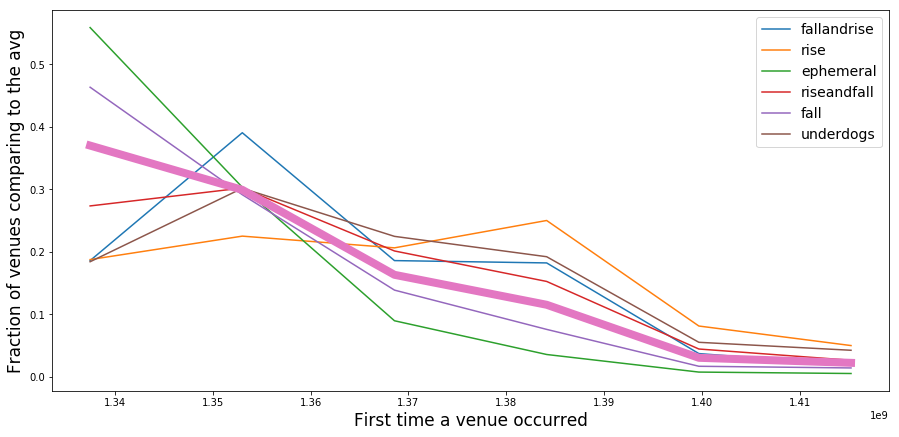

In [30]:
f, ax    = plt.subplots(1, 1, figsize = (15,7))


sss = []

for ind, (cl, firsttimes) in enumerate(first_times.items()): 
    firsttimes = [round_unix_date(f) for f in firsttimes]
    #ax.plot(x, y) 
    
    print firsttimes
    sss += firsttimes
    #print len(y)

    
xxx, yyy = getDistribution(sss)
    
    
for ind, (cl, firsttimes) in enumerate(first_times.items()): 
    firsttimes = [round_unix_date(f) for f in firsttimes]
    x, y = getDistribution(firsttimes)
    #y = np.asarray(y) / np.asarray(yyy)
#    print 'y', np.asarray(y) #/ np.asarray(yyy)
#print 'yy', np.asarray(yyy)
    ax.plot(x, y, label = cl) 

    
    ax.legend(loc = 'best', fontsize = 14)
    

    #print len(y)    
 



    
ax.plot(xxx, yyy, linewidth = 8)
    

#bx, by = getBinnedDistribution(xxx, yyy, 10)
#bx     = (bx[1:] + bx[:-1])/2
#ax.plot(bx, by, linewidth = 8, color = 'r')

ax.set_xlabel('First time a venue occurred', fontsize = 17)
ax.set_ylabel('Fraction of venues comparing to the avg', fontsize = 17)





In [12]:
#f, ax    = plt.subplots(1, 1, figsize = (15,7))
sss   = []
dicts = {}  

for ind, (cl, firsttimes) in enumerate(first_times.items()): 
    
    firsttimes = [round_unix_date(f) for f in firsttimes]

    print dict(Counter(firsttimes))

{1337472000.0: 50, 1384128000.0: 49, 1368576000.0: 50, 1399680000.0: 10, 1415232000.0: 5, 1353024000.0: 105}
{1337472000.0: 30, 1368576000.0: 33, 1399680000.0: 13, 1353024000.0: 36, 1415232000.0: 8, 1384128000.0: 40}
{1353024000.0: 399, 1337472000.0: 735, 1368576000.0: 118, 1399680000.0: 10, 1415232000.0: 7, 1384128000.0: 47}
{1384128000.0: 144, 1337472000.0: 258, 1368576000.0: 190, 1399680000.0: 42, 1415232000.0: 25, 1353024000.0: 285}
{1337472000.0: 1563, 1353024000.0: 983, 1368576000.0: 468, 1399680000.0: 57, 1415232000.0: 48, 1384128000.0: 256}
{1399680000.0: 117, 1353024000.0: 639, 1368576000.0: 476, 1337472000.0: 390, 1415232000.0: 90, 1384128000.0: 407}


In [12]:
firsttimes_min = {}
firsttimes_cl  = {}


for cl, data in timeseries_senior_custers.items():
    
    for venue, times in data.items():
        
        firsttimes_min[venue] = min(times)
        firsttimes_cl[venue]  = cl 
    
        

df = pd.DataFrame.from_dict(firsttimes_min.items())#,index=0)#, columns=1, values=2)
df = df.rename(columns = {0 : 'venue', 1 : 'min'})
df.index = df.venue
df = df.drop(columns = ['venue'])

df2 = pd.DataFrame.from_dict(firsttimes_cl.items())#,index=0)#, columns=1, values=2)
df2 = df2.rename(columns = {0 : 'venue', 1 : 'cluster'})
df2.index = df2.venue
df2 = df2.drop(columns = ['venue'])


df = df.join(df2)

encode_cats(df, 'cluster')


df.head()  

,min,cluster
venue,,
4cd2a674df88a35d1efe69a0,1.365240e+09,1
4e5fd59fb0fb754192cffc44,1.365457e+09,5
4c91e73051d9b1f758358446,1.377949e+09,3
4ac518daf964a520c9a820e3,1.349958e+09,1
530c5251498e23d2a004b4a7,1.395050e+09,5


In [13]:
from sklearn.naive_bayes import GaussianNB
X = df#.drop(columns = ['LABEL_category'])
y = np.asarray(df['cluster'])

In [13]:
def classifiers(XX, yy, randomized):
      
        
    XX_ = XX
    y_ = yy
        
    #y_ = [0 if yyy == 0 else 1 for yyy in yy]    
        
        
    if randomized: 
        random.shuffle(y_) 
        
    
    print Counter(y_)
        
    #classifier = RandomForestClassifier(max_depth=4, n_estimators=1000, max_features='auto') 
    classifier = GaussianNB()#SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]¶

    # 
    
    
    X_train, X_test, y_train, y_test =  train_test_split(XX_, y_, test_size=.33, random_state=42)#, stratify = y_)


    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)

    preds = classifier.predict(X_test)
    print  'Accuracy: ', score#, np.mean(cross_val_score(classifier, X_train, y_train, cv=3))

    #print 'Randomized: ', randomized, '\tAccuracy: ', score, '\n'
    print classification_report(y_test, preds), '\n\n'
    
     
    
classifiers(X, y, False)
classifiers(X, y, True)

NameError: name 'X' is not defined

# Success of venues as predictor of class

In [14]:
features.head()

,WHERE_sub_region,WHERE_distance_from_center,WHERE_building,WHERE_food,WHERE_na,WHERE_travel,WHERE_Venues_num,WHERE_user_centroids,WHERE_parks_outdoors,WHERE_Entropy,...,WHO_v_wa_geo_stdev_of_ego_inv_distances,WHO_v_wa_betweenness_wa,WHO_v_wa_clustering_grav_distances,WHO_v_wa_geo_social_stretch_distances,WHO_v_wa_egosize,WHO_v_wa_geo_stdev_of_ego_distances,WHO_v_wa_constraint_wa,WHO_v_wa_pagerank_exp_distances,WHO_v_wa_eigenvector,LABEL_category
venue,,,,,,,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0,4.064099,0.175676,0.280405,0.010135,0.187500,592,192,0.043919,0.811208,...,0.0,0.0,0.0,2.019477,2.0,0.0,1.0,0.000019,0.0,fall
4abcec53f964a520b98720e3,0,0.232250,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,fall
4abdc1c7f964a5206d8b20e3,0,2.306181,0.317386,0.252042,0.016336,0.039090,1714,651,0.030922,0.781289,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,fall
4abe4502f964a520558c20e3,0,1.137742,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,underdogs
4abe5714f964a520d68c20e3,0,0.707539,0.199941,0.273588,0.016169,0.053239,10143,5276,0.012620,0.770677,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,fall


In [32]:
city        = 'london'
datafile    = 'FINAL_DATA'
successdata = datafile + '/london_venues_success_measures.csv'
venues      = [line.strip() for line in open(datafile + '/senior_venues_lists.dat')]


success  = pd.read_csv(successdata, sep = '\t', index_col = 0)
success  = success[~success.index.duplicated(keep='first')]   
success  = success[success.index.isin(venues)]



successdata_L = datafile + '/london_venues_success_measures_local_like.csv'
success_L     = pd.read_csv(successdata_L, sep = '\t', index_col = 0)
success_L     = success_L[~success_L.index.duplicated(keep='first')]   
success       = success.join(success_L)

success.index.name = 'venue'

success.head()   

,tipCount,checkinsCount,usersCount,Llikecount
venue,,,,
4a5f9446f964a520e0bf1fe3,75.0,2500.0,1831.0,33.195062
4abcec53f964a520b98720e3,17.0,1550.0,913.0,16.468388
4abdc1c7f964a5206d8b20e3,47.0,5573.0,2777.0,91.575568
4abe4502f964a520558c20e3,575.0,97190.0,80793.0,445.616354
4abe5714f964a520d68c20e3,54.0,1507.0,1256.0,49.789535


In [33]:
import math
import seaborn as sns

#success_label = success
#for key in success_label.keys():
#    success_label[key] = list([math.log(k) if k > 0  else 1 for k in success_label[key]] )


success_label = success.join(pd.DataFrame(features.LABEL_category))
success_label = success_label.dropna()

set(success_label.LABEL_category)

{'ephemeral', 'fall', 'fallandrise', 'rise', 'riseandfall', 'underdogs'}

In [17]:
def getDistribution(keys, normalized = False):
    
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    distr = np.bincount(bins) 

    if normalized == 1: distr = distr/float(np.sum(distr)) 

    return np.asarray(uniq_keys.tolist()), np.asarray(distr.tolist())


def getBinnedDistribution(x, y, nbins):

    n, bins   = np.histogram(x, bins=nbins)
    sy, _  = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    mean = sy/n
     
    std = np.sqrt(sy2/n - mean*mean) 

    return _, mean, std


def getLogBinnedDistribution(x, y, nbins):

    bins   = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), nbins)  
    values = [ np.mean([y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]    
    error  = [ np.std( [y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]
    bins   = (bins[1:] + bins[:-1])/2

    return bins, values, error


def getPercentileBinnedDistribution(x, y, nbins):

    x, y = zip(*sorted(zip(x, y), key=lambda tup: tup[0]))
    elements_per_bin = int(len(x)/float(nbins))

    xx  = [np.mean(x[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    yy  = [np.mean(y[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    std = [np.std(y[i*elements_per_bin:(i+1)*elements_per_bin])  for i in range(nbins)]

    return xx, yy, std



clusters = list(set(success_label.LABEL_category))
clusters


['fallandrise', 'rise', 'ephemeral', 'riseandfall', 'fall', 'underdogs']

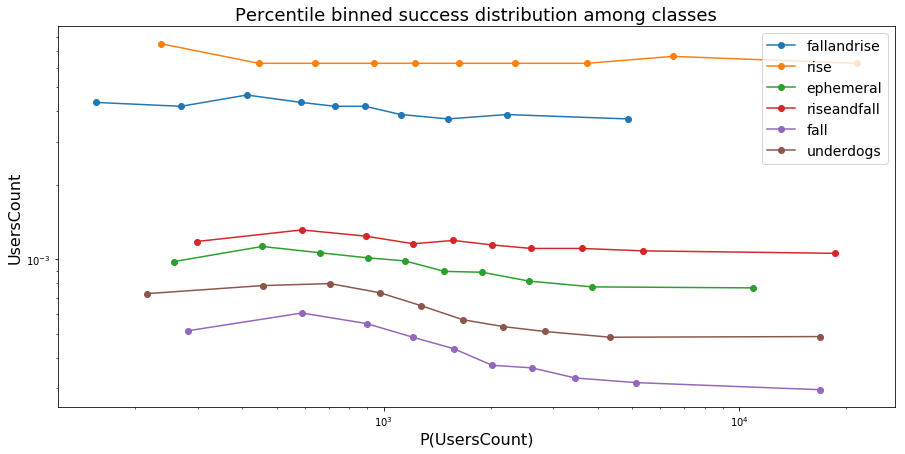

In [18]:
f, ax = plt.subplots(1,1,figsize = (15,7))

for cluster in clusters:
    
    dat = list(success_label[success_label.LABEL_category == cluster].checkinsCount)
    x,   y     = getDistribution(dat, True)
      
    bx, by,  e = getPercentileBinnedDistribution(x, y,10)

    ax.plot(bx,by, 'o-', label = cluster)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc = 'best', fontsize = 14)
    
    ax.set_title('Percentile binned success distribution among classes', fontsize = 18)
    ax.set_xlabel('P(UsersCount)'  , fontsize = 16)
    ax.set_ylabel('UsersCount'  , fontsize = 16)
    

In [19]:
def classifiers(XX, yy):
      
    XX_ = XX
    y_ = yy
        
    classifier = SVC()#SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]¶
    X_train, X_test, y_train, y_test =  train_test_split(XX_, y_, test_size=.33, random_state=42)#, stratify = y_)
    
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)

    preds = classifier.predict(X_test)
    print  'Accuracy: ', score#, np.mean(cross_val_score(classifier, X_train, y_train, cv=3))

    #print 'Randomized: ', randomized, '\tAccuracy: ', score, '\n'
    print classification_report(y_test, preds), '\n\n'
    
     

X = success_label.drop(columns = ['LABEL_category'])
y = np.asarray(success_label['LABEL_category'])

classifiers(X, y)

Accuracy:  0.4046649389115142
             precision    recall  f1-score   support

  ephemeral       0.00      0.00      0.00       435
       fall       0.40      1.00      0.58      1093
fallandrise       0.00      0.00      0.00        94
       rise       0.00      0.00      0.00        62
riseandfall       0.00      0.00      0.00       318
  underdogs       0.00      0.00      0.00       699

avg / total       0.16      0.40      0.23      2701





/home/milan/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
success_label

NameError: name 'success_label' is not defined

269
160
1316
944
3375
2119


,tipCount,checkinsCount,usersCount,Llikecount,LABEL_category
quartile,,,,,
q1,692,692,692,692,692
q2,509,509,509,509,509
q3,453,453,453,453,453
q4,465,465,465,465,465


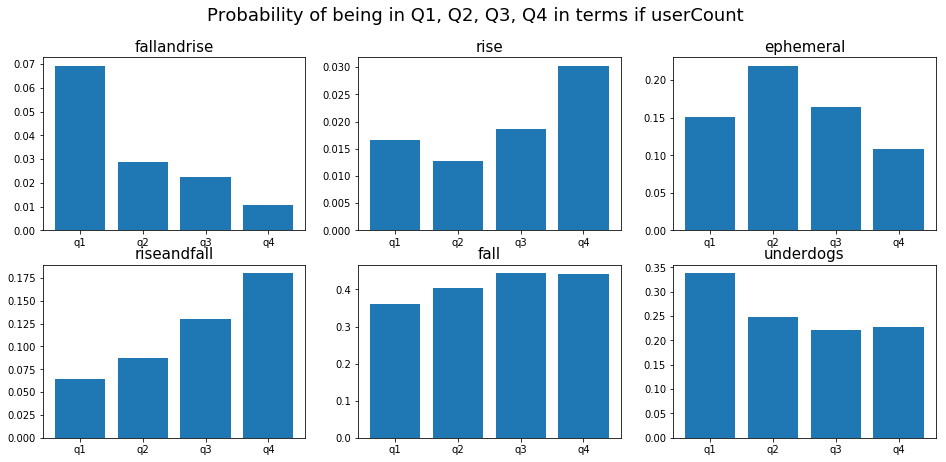

In [22]:
f, ax     = plt.subplots(2,3, figsize = (16,7))
indicies  = [(i,j) for i in range(2) for j in range(3)]


success_label2 = success_label
success_label2 ['quartile'] = pd.qcut(success_label2['Llikecount'], 4, ['q1', 'q2', 'q3', 'q4'])


for ind, c in enumerate(clusters):
    
    bx = ax[indicies[ind]]
    
    df     = success_label2[success_label2.LABEL_category == c]
    
    print len(df)

    df     = df.groupby('quartile').count()
    df_all = success_label2.groupby('quartile').count()
    
    
    x         = df.index
    clustered = np.asarray(df.usersCount,     dtype=np.float64)
    allv      = np.asarray(df_all.usersCount, dtype=np.float64)

    bx.set_title(c, fontsize = 15)
    bx.bar(x, clustered / allv)
    
    
plt.suptitle('Probability of being in Q1, Q2, Q3, Q4 in terms if userCount', fontsize = 18)

df.head()

# GENDER STUFF

In [ ]:
venues_users = {}
for ind, line in enumerate(open('../../ProcessedData/london/venues_info/london_venues_users.dat')):
    #if ind == 100: break
    fields = line.strip().split('\t')
    venue = fields[0]
    users = fields[1:] 
    venues_users[venue] = users
    

In [ ]:
users_genders = {}
for line in open('../../ProcessedData/london/user_info/users_gender.dat'):
    user, gender = line.strip().split('\t')
    users_genders[user] = gender


In [ ]:
senior_venues = set(list(success_label.index))

In [ ]:
venues_users_genders = {}

for venue, users in venues_users.items():
        
    if venue in senior_venues:

        venues_users_genders[venue] = {}

        for user in users:

            gender = users_genders[user]

            if gender not in venues_users_genders[venue]:
                venues_users_genders[venue][gender] = 1
            else:
                venues_users_genders[venue][gender] += 1

In [ ]:
venues_users_female_fraction = {}
for ind, (venue, items) in enumerate(venues_users_genders.items()):   
    if 'female' in items:
        f = float(items['female'])
    else:
        f = 0.0
        
    if 'male' in items:    
        m = float(items['male'])
    else:
        m = 0.0
        
    if f + m > 0.0 and f > 0.0 and m > 0.0: 
        venues_users_female_fraction[venue] = f / (f + m)

In [ ]:
df_gender = pd.DataFrame(venues_users_female_fraction.items())
df_gender = df_gender.rename(columns = {0 : 'venue', 1 : 'female'})
df_gender.index = df_gender['venue']
df_gender = df_gender.drop(columns = 'venue')



df_gender = df_gender.join(pd.DataFrame(success_label.LABEL_category))
df_gender = df_gender.dropna()
df_gender.head()


df_gender.to_csv('venues_genders.csv', '\t')


In [ ]:
f, ax = plt.subplots(1,1, figsize = (15,7))
nbins = 10

for c in clusters:
    
    df3 = df_gender[df_gender.LABEL_category == c]
    x   = np.asarray([float(fff) for fff in list(df3['female'])])

    counts, bins, bars = ax.hist(x, normed = True, bins = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), nbins), log=False,alpha=0.0, cumulative=0)

    ax.plot((bins[1:] + bins[:-1])/2,counts,  'o--', markersize = 13, label = c)
    ax.legend(loc = 'best', fontsize = 14)
    ax.set_xlabel('Fraction of female visitors', fontsize = 16)
    ax.set_ylabel('Histogram', fontsize = 16)

    

In [ ]:
 counts, bins, bars = ax.hist(rand, normed = True, bins = 10 ** np.linspace(np.log10(min(x_rand)), np.log10(max(x_rand)), nbins), log=True,alpha=0.0, cumulative=1)
    ax.plot((bins[1:] + bins[:-1])/2, counts, 's-', color = 'royalblue', alpha = 0.0, markersize = 0, linewidth = 5)
    bins = (bins[1:] + bins[:-1])/2    


In [ ]:
x = np.asarray([round(float(fff), 3) for fff in list(df3['female'])])